## 1 Préparation des données

### 1.1 Téléchargement de données

Contrairement aux autres projets où la base de données était dans un fichier CSV, dans le présent projet nous allons charger une base de données directement via une fonction de la bibliothèque Scikit-Learn. Cette fonction est nommée "fetch_openml" et elle existe dans le sous-module datasets du module sklean. Utilisez cette fonction pour charger, dans une variable, la version 1 (version=1) de la base de données nommée "mnist_784".

Cette base de données est constituée de petites images représentant des chiffres écrits à la main.

Elle est considérée comme le "hello world !" de la classification.

In [1]:
import numpy as np
import scipy
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier

In [2]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)

display(mnist)

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixe

### 1.2 Information sur les données

1. Le retour de la fonction "fetch_openml" est un dictionnaire (mnist). Affichez ces clés.

In [3]:
display(mnist.keys())

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

2. En utilisant les clés du dictionnaire "mnist", affichez :

• La taille des données (le nombre des features et la taille de chaque feature). Par con-
vention, les données sont à stocker dans une variable "X".

In [4]:
X = mnist.data
display(X.shape)

(70000, 784)

• La taille des labels=classes (le nombre des labels). Par convention, les classes sont souvent à stocker dans une variable "y"

In [5]:
y = np.array(mnist.target)
#y = y.reshape(-1, 1)
display(np.array(y).shape)

(70000,)

• Les différentes classes de la base de données

In [6]:
display(mnist.feature_names)

['pixel1',
 'pixel2',
 'pixel3',
 'pixel4',
 'pixel5',
 'pixel6',
 'pixel7',
 'pixel8',
 'pixel9',
 'pixel10',
 'pixel11',
 'pixel12',
 'pixel13',
 'pixel14',
 'pixel15',
 'pixel16',
 'pixel17',
 'pixel18',
 'pixel19',
 'pixel20',
 'pixel21',
 'pixel22',
 'pixel23',
 'pixel24',
 'pixel25',
 'pixel26',
 'pixel27',
 'pixel28',
 'pixel29',
 'pixel30',
 'pixel31',
 'pixel32',
 'pixel33',
 'pixel34',
 'pixel35',
 'pixel36',
 'pixel37',
 'pixel38',
 'pixel39',
 'pixel40',
 'pixel41',
 'pixel42',
 'pixel43',
 'pixel44',
 'pixel45',
 'pixel46',
 'pixel47',
 'pixel48',
 'pixel49',
 'pixel50',
 'pixel51',
 'pixel52',
 'pixel53',
 'pixel54',
 'pixel55',
 'pixel56',
 'pixel57',
 'pixel58',
 'pixel59',
 'pixel60',
 'pixel61',
 'pixel62',
 'pixel63',
 'pixel64',
 'pixel65',
 'pixel66',
 'pixel67',
 'pixel68',
 'pixel69',
 'pixel70',
 'pixel71',
 'pixel72',
 'pixel73',
 'pixel74',
 'pixel75',
 'pixel76',
 'pixel77',
 'pixel78',
 'pixel79',
 'pixel80',
 'pixel81',
 'pixel82',
 'pixel83',
 'pixel84',
 

• Une description détaillée de la base de données.

In [7]:
mnist["DESCR"]

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

3. A travers cette question, vous avez dû conclure que la base de données MNIST contient 70000 images en niveau de gris, et chaque image est caractérisée par un features de taille 784=28*28.

• Affichez l’image de la première instance de la base de données.

• Affichez la classe de la première instance

'5'

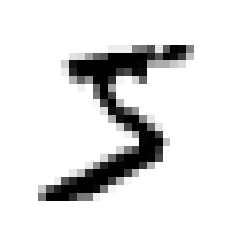

In [8]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show

display(y[0])

4. Affichez le type des labels (du premier label par exemple)

In [9]:
display(y.dtype)

dtype('O')

5. A travers la question précédente, vous avez dû remarquer que le type des labels est une chaîne de caractères. Il est préférable, dans les projets d’apprentissage automatique, d’utiliser des chiffres. Par conséquent, appliquez le casting sur les labels pour les transformer à des entiers.

In [10]:
y=y.astype(int)
    
display(y.dtype)

dtype('int32')

### 1.3 Répartition des données

Contrairement aux précédents projets, les données dans MNIST sont déjà partitionnées en base d’apprentissage et en base  de test. Les 60 000 premières images composeront la base d’apprentissage et le reste des images constituera la base de test. Écrivez un code qui met en exergue cette répartition tout en stockant les données de test/d’apprentissage et les classes de test/d’apprentissage dans 4 variables.

In [11]:
X_train, X_test = X[:60000], X[60000:]

display(len(X_train))
display(len(X_test))

y_train, y_test = y[:60000], y[60000:]

display(len(y_train))
display(len(y_test))

60000

10000

60000

10000

## 2 Apprentissage d’un classifieur binaire

Comme indiqué dans les objectifs, ce projet vise à classifier les chiffres. Une des solutions est d’utiliser un classifieur binaire qui est apte d’identifier que l’image représente bien le chiffre que nous cherchons ou non. Par exemple, nous nous focaliserons sur la reconnaissance du chiffre 5

### 2.1 Apprentissage des données

1. En utilisant les labels d’apprentissage et de test, écrivez un code qui stocke dans deux variables (une première pour la base d’apprentissage et une autre pour la base de test) distinctes True si le classe de l’instance est 5 et False Sinon. De ce fait, nous traitons une classification binaire.

In [12]:
y_train_5 = (y_train == 5)
        
display(np.unique(y_train_5,return_counts=True))

y_test_5 = (y_test == 5)
        
display(np.unique(y_test_5,return_counts=True))

(array([False,  True]), array([54579,  5421], dtype=int64))

(array([False,  True]), array([9108,  892], dtype=int64))

2. Pour l’apprentissage des données, nous allons utiliser le classifieur Stochastic Gradient Descent (SGD). Utiliser ce modèle pour la prédiction sur un chiffre (exemple 5).

In [13]:
clf5 = SGDClassifier()
clf5.fit(X_train, (y_train == 5))
SGDClassifier(max_iter=5)
clf5.predict([X_train[0]])

array([False])

### 2.2 Évaluation du modèle d’apprentissage sur les données d’apprentissage

La mesure de performance d’une méthode de classification est souvent plus délicate qu’une méthode de régression. Cela est dû au nombre de mesures de performance existantes dans la littérature.

#### 2.2.1 Taux de classification

1. Écrivez un code qui répartit la base d’apprentissage en base d’apprentissage et en base de validation en utilisant la méthode 3-fold cross-validation. Optez pour la valeur "accuracy" pour l’argument "scoring" pour afficher :

• le taux de classification (accuracy) de chaque fold

• la moyenne des taux de classification

In [14]:
from sklearn.model_selection import cross_val_score

In [15]:
score = cross_val_score(clf5, X_train, y_train_5, cv=3, scoring="accuracy", n_jobs=-1)
score

array([0.9529 , 0.95995, 0.9533 ])

In [16]:
score.mean()

0.9553833333333334

2. Dans cette question, vous allez créer un classifieur simple qui classifie toutes les images de MNIST comme "non-5". Créez une classe Never5Classifier qui hérite de la classe BaseEstimator. la classe BaseEstimator existe dans le sous-module "base" du module "sklearn"

In [17]:
from sklearn.base import BaseEstimator

3. Dans la classe Never5Classifier, créez :

• Une méthode fit qui prend en argument les données et les labels. Cette méthode ne va rien retourner et par conséquent va contenir que le mot-clé "pass". Vous allez implémenter cette méthode car l’héritage de la classe BaseEstimator l’exige

• Une méthode predict qui prend en argument les données et retourne une structure de données ayant la taille des données et qui contient que la valeur False (= non-5). Utilisez la fonction "zeros" du module "numpy" avec un "dtype=bool"

In [18]:
class Never5Classifier(BaseEstimator):
    def fit(self, X, y):
        pass
    def predict(self, data):
        structure = np.zeros((len(data),1), dtype=bool)
        return structure

4. Créez un objet de la classe Never5Classifier

In [19]:
never5 = Never5Classifier()
never5

Never5Classifier()

5. Testez le classifieur en utilisant une validation croisée de type 3-fold cross-validation. Optez pour la valeur "accuracy" pour l’argument "scoring" pour afficher : le taux de classification (accuracy) de chaque fold; La moyenne des taux de classification.

In [20]:
never5.fit(X_train, y_train)

In [21]:
score_never5 = cross_val_score(never5, X_train, y_train, cv=3, scoring="accuracy", n_jobs=-1)

In [22]:
score_never5

array([0.0997 , 0.0965 , 0.09995])

#### 2.2.2 Matrice de confusion:

1. En utilisant le modèle déjà construit du classifieur SGD, prédisez les classes des données d’apprentissage. Pour ce faire, utilisez la fonction "cross_val_predict" du sous-module "model_selection" du module "sklearn". Optez pour une validation croisée de type 3-fold cross validation.

In [23]:
from sklearn.model_selection import cross_val_predict

In [24]:
cv_predict = cross_val_predict(clf5, X_train, y_train_5, cv=3, n_jobs=-1)

In [25]:
cv_predict

array([ True, False, False, ...,  True, False, False])

2. Affichez la matrice de confusion du modèle d’apprentissage. Veillez à bien interpréter la matrice de confusion.

In [26]:
from sklearn.metrics import plot_confusion_matrix

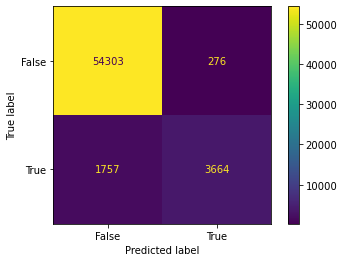

In [27]:
plot_confusion_matrix(clf5, X_train, y_train_5)

Le modèle identifie un grand nombre de chiffres autres que 5 ainsi qu'une bonne partie des 5. Une partie des 5 est identifiée comme des non 5, et une plus petite partie des non 5 comme des 5.

#### 2.2.3 Précision et rappel:

1. Calculez la précision, le rappel et le score F1 du modèle d’apprentissage

In [28]:
from sklearn.metrics import precision_recall_fscore_support

In [29]:
y_pred = clf5.predict(X_train)

In [30]:
precision, recall, f1, _ = precision_recall_fscore_support(y_train_5, y_pred, average="weighted")

print("Précision :", precision, "\nRappel :", recall, "\nScore F1 :", f1)

Précision : 0.9651611910869607 
Rappel : 0.9661166666666666 
Score F1 : 0.9636631115379465


2. Pour classifier les instances, le classifieur SGD calcule un score en se basant sur sa fonctionde décision. Si le score est supérieur à un seuil, il affecte la classe positive à l’instance sinon il affecte la classe négative. Affichez les scores des différentes instances de la base d’apprentissage via la fonction "cross_val_predict". Optez pour une valeur de "decision_function" pour l’argument "method" et une validation croisée de type 3-fold crossvalidation.

In [31]:
cv_predict2 = cross_val_predict(clf5, X_train, y_train_5, cv=3, method="decision_function", n_jobs=-1)
cv_predict2

array([  5737.883888  , -10313.65602464, -24676.65239096, ...,
         7874.73216664, -10114.26252416, -15668.82091391])

3. Calculez les précisions et les rappels de chaque instance en utilisant la fonction "precision_ recall_curve"

In [32]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve

In [33]:
precision2, recall2, _ = precision_recall_curve(y_train_5, cv_predict2)
display(precision2)
display(recall2)

array([0.09044497, 0.09042979, 0.0904313 , ..., 1.        , 1.        ,
       1.        ])

array([1.00000000e+00, 9.99815532e-01, 9.99815532e-01, ...,
       3.68935621e-04, 1.84467810e-04, 0.00000000e+00])

4. Tracez la courbe des précisions/rappels. L’axe des abscisses doit contenir les rappels et l’axe des ordonnées doit contenir les précisions. Interprétez les résultats.

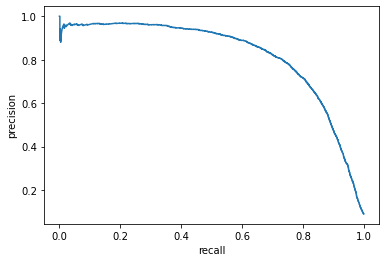

In [34]:
plt.plot(recall2, precision2)
plt.xlabel("recall")
plt.ylabel("precision")
plt.show()

#### 2.2.4 Courbe ROC:

1. Calculez le taux de faux positifs (tfp), le taux de vrais positifs (tvp) et les seuils utilisés pour classifier les données d’apprentissage. Pour ce faire, utilisez la fonction "roc_curve" du sousmodule "metrics" du module "sklearn"

In [35]:
from sklearn.metrics import roc_curve

In [36]:
tfp, tvp, seuils = roc_curve(y_train_5, cv_predict2, pos_label=1)
display(tfp)
display(tvp)
display(seuils)

array([0.        , 0.        , 0.        , ..., 0.99884571, 0.99884571,
       1.        ])

array([0.00000000e+00, 1.84467810e-04, 1.47574248e-03, ...,
       9.99815532e-01, 1.00000000e+00, 1.00000000e+00])

array([  37269.24344784,   37268.24344784,   30073.6317042 , ...,
        -92773.2973913 ,  -92839.55831687, -141474.62057248])

2. Tracez la courbe des ROC. L’axe des abscisses doit contenir les taux de faux positifs et l’axe des ordonnées doit contenir les taux de vrais positifs. Ajoutez des titres à ces deux axes et activer le mode "grid" avec la fonction grid de matplotlib

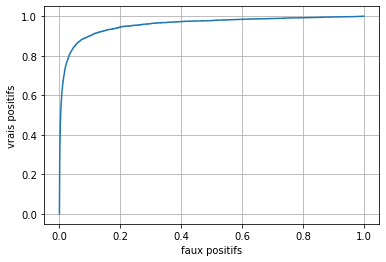

In [37]:
plt.plot(tfp, tvp)
plt.xlabel("faux positifs")
plt.ylabel("vrais positifs")
plt.grid()
plt.show()

3. Calculez l’AUC (Area Under the Curve) du modèle d’apprentissage. Pour ce faire, utilisez la fonction "roc_auc_score" du sous-module "metrics" du module "sklearn".

In [38]:
from sklearn.metrics import roc_auc_score

In [39]:
auc = roc_auc_score(y_train_5, cv_predict2)
auc

0.9576547464445688

## 3 Apprentissage d’un classifieur multi-classes

Dans cette partie, nous allons apprendre un classifieur à classifier les 10 classes (les chiffres de 0 à 9) de la base de données MNIST.

### 3.1 Apprentissage des données

1. En se basant sur le classifieur SGD, faites l’apprentissage du modèle en se basant sur toutes les instances (images) d’apprentissage. Ainsi le modèle va apprendre à partir de toutes les classes de la BD et non pas juste à partir de deux classes comme c’était le cas dans la partie II de TP.

In [40]:
clf = SGDClassifier()
clf.fit(X_train, y_train)

SGDClassifier()

2. Via le modèle d’apprentissage bâti, prédisez la classe de la première instance de la base de données (celle de la question 3). La prédiction va être, cette fois-ci, un chiffre de 0 à 9.

array([5])

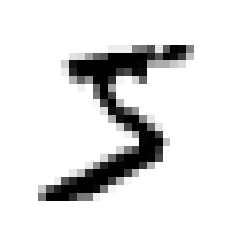

array([0])

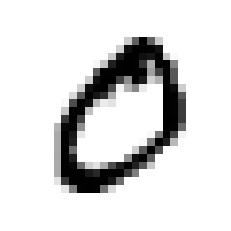

array([4])

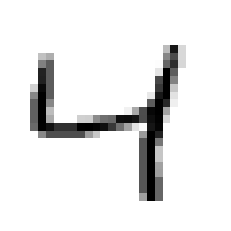

array([1])

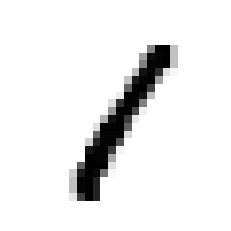

array([9])

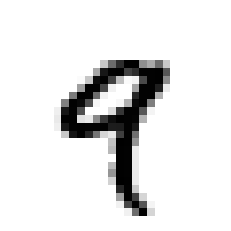

In [41]:
for i in range(5):
    display(clf.predict([X_train[i]]))

    some_digit2 = X_train[i]
    some_digit_image2 = some_digit2.reshape(28, 28)
    plt.imshow(some_digit_image2, cmap="binary")
    plt.axis("off")
    plt.show()

3. En utilisant l’objet qui instancie la classe SGDClassifier :

• Affichez, via la méthode "decision_function", les 10 scores de décision utilisés par la méthode SGD pour classifier la première instance de la base de données.

In [42]:
clf.decision_function(X_train)[0]

array([ -9898.37114088, -25577.51635117,  -8692.07186587,  -1848.2109995 ,
       -15001.45350639,   7952.09015063, -30126.49915046, -17699.69670479,
        -8629.72775955, -13129.2692423 ])

• Affichez, via l’attribut "classes_", les différentes classes utilisées par le classifieur. Qu’est ce que vous remarquez ?

In [43]:
clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Les classes sont les 10 chiffres, dans le bon ordre.

### 3.2 Évaluation du modèle d’apprentissage sur les données d’apprentissage

#### 3.2.1 Taux de classification

1. Écrivez un code qui répartit la base d’apprentissage en base d’apprentissage et en base de validation en utilisant la méthode 3-fold cross-validation. Optez pour la valeur "accuracy" pour l’argument "scoring" pour afficher : le taux de classification (accuracy) de chaque fold; la moyenne des taux de classification

In [44]:
score2 = cross_val_score(clf, X_train, y_train, cv=3, scoring="accuracy", n_jobs=-1)
score2

array([0.85965, 0.8715 , 0.87115])

In [45]:
score2.mean()

0.8674333333333334

2. Une des techniques d’amélioration des taux de classification est le "Scaling". Vérifiez ceci en appliquant une standardisation sur les données d’apprentissage avec la classe StandartScaler.

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [47]:
scaler.fit(X_train)

StandardScaler()

In [48]:
scaled = scaler.transform(X_train)
display(scaled)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [49]:
clf_scaled = SGDClassifier()
clf_scaled.fit(scaled, y_train)

SGDClassifier()

3. Évaluez le modèle sur les nouvelles données d’apprentissage avec une validation croisée de type 3-fold cross-validation. Les résultats sont-ils meilleurs que ceux avant le Scaling?

In [50]:
score3 = cross_val_score(clf_scaled, scaled, y_train, cv=3, scoring="accuracy", n_jobs=-1)
score3

array([0.90005, 0.89625, 0.9074 ])

#### 3.2.2 Matrice de Confusion

1. En utilisant le modèle déjà construit du classifieur SGD, prédisez les classes des données d’apprentissage.

In [51]:
cv_predict3 = cross_val_predict(clf_scaled, scaled, y_train, cv=3, n_jobs=-1)

In [53]:
cv_predict3

array([3, 0, 4, ..., 5, 6, 8])

2. Affichez la matrice de confusion du modèle d’apprentissage. Pour ce faire, utilisez la fonction "confusion_matrix" du sous-module "metrics" du module "sklearn". La taille de la matrice de confusion, cette fois-ci, est 10x10 car on traite un problème de classification de 10 classes. Interprétez les résultats.

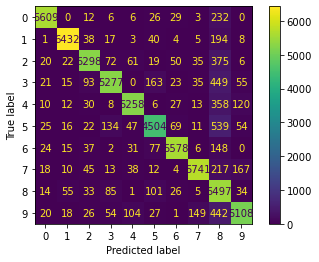

In [52]:
plot_confusion_matrix(clf_scaled, scaled, y_train)

L'algorithme reconnaît les chiffres avec une assez grande efficacité, même s'il a tendance à créer trop de faux positifs poru le 8.